Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
#from xgboost import XGBRegressor


Data importation & Creating DataFrame


In [ ]:
df = pd.read_csv("insurance.csv")
print(df.head())
print(df.tail())
print(df.shape)
print(df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603
(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   i

Checking the dataframe for nulls and duplicates

In [ ]:
print(df.isna().sum())
print(df.duplicated().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
1


In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

 Exploratory Data Analysis

The distribution of BMI

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


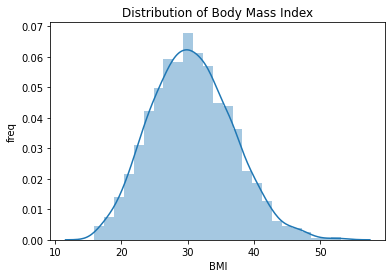

In [ ]:
plt.figure()
sns.distplot(df["bmi"])
plt.xlabel("BMI")
plt.ylabel("freq")
plt.title("Distribution of Body Mass Index");

With default parameters of seaborns distplot function, it can easily be observed that BMI is well distributed. It is also possible to observe a Gaussian Curve.

* Relationship between smoker and charges




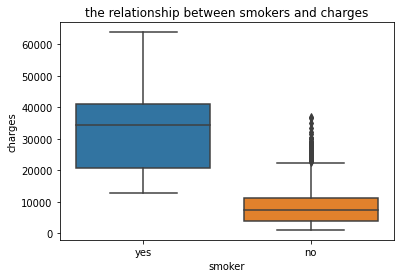

In [ ]:
plt.figure()
sns.boxplot(x="smoker",y="charges",data=df)
plt.title("the relationship between smokers and charges")
plt.show()


We can observe that smoking people have more charges than non-smoking ones.

* Relationship between smoker and region



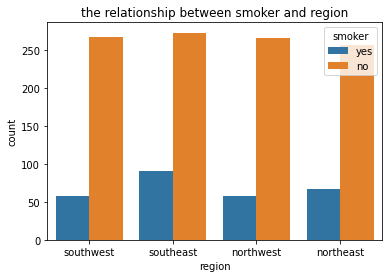

In [ ]:
plt.figure()
sns.countplot(data=df, x="region", hue="smoker")
plt.title("the relationship between smoker and region")
plt.show()

Southeast has the most people smoking where southwest has the least.

* Relationship between sex and bmi

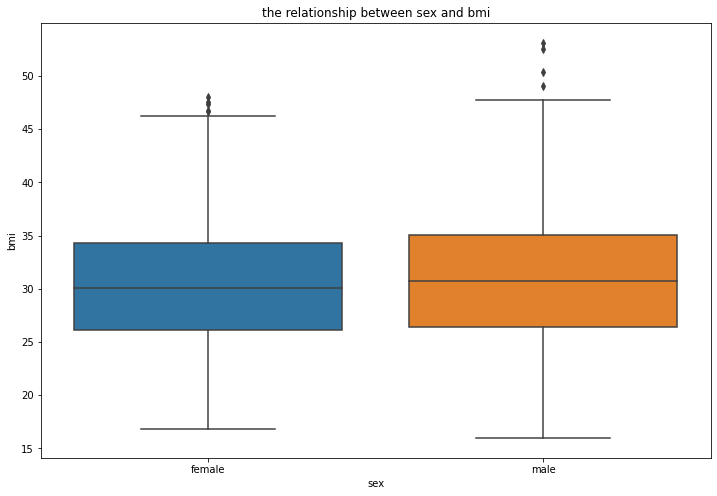

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x="sex",y="bmi",data=df)
plt.title("the relationship between sex and bmi")
plt.show()


We had to change the figsize as there is a tiny difference between the BMI's of males and females. Males have a little higher BMI value than females.

* Region with most children

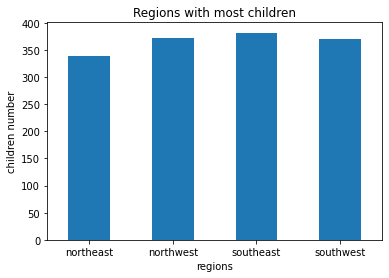

In [ ]:
plt.figure()
df.children.groupby(df["region"]).sum().plot.bar()
plt.title("Regions with most children")
plt.xlabel("regions")
plt.ylabel("children number")
plt.xticks(rotation=0);

Southeast has more children than other regions.

* Relationship between age and bmi

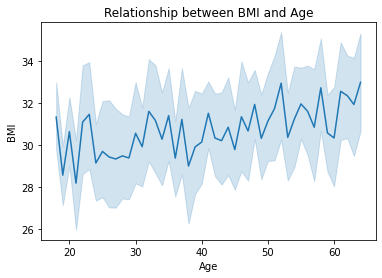

In [ ]:
plt.figure()
sns.lineplot(data=df, x="age", y="bmi")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Relationship between BMI and Age");

There is no correlation between age and bmi.

* Relationship between bmi and children

In [1]:
plt.figure(figsize=(9,6))
sns.lineplot(data=df, x="children", y="bmi")
plt.xlabel("Children")
plt.ylabel("BMI")
plt.title("Relationship between BMI and Children");

NameError: ignored

There is no relationship between number of children and bmi

*   Outlier in the bmi

In [ ]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df["bmi"]);

There are some outliers in the bmi column

*   Relationship between bmi and charges

In [ ]:
scatterplot("bmi", "charges", "Relationship between BMI and Charges")

bmi and charges have no linear correlation

*   Relationship between region smoker and bmi

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(x="region", y="bmi", data=df, hue="smoker");

In southwest, smokers and non-smokers have the highest bmi. In northwest, smokers and non-smokers have the lowest bmi

# ** Data PreProcessing**

We need numerical data so we need to check for the columns including categorical data

In [ ]:
df.select_dtypes("object").nunique()

sex       2
smoker    2
region    4
dtype: int64

In [ ]:
encoder = LabelEncoder()
df["sex"] = encoder.fit_transform(df["sex"])
df["smoker"] = encoder.fit_transform(df["smoker"])
df["region"] = encoder.fit_transform(df["region"])
print(df.head())
print(df.tail())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520
      age  sex    bmi  children  smoker  region     charges
1333   50    1  30.97         3       0       1  10600.5483
1334   18    0  31.92         0       0       0   2205.9808
1335   18    0  36.85         0       0       2   1629.8335
1336   21    0  25.80         0       0       3   2007.9450
1337   61    0  29.07         0       1       1  29141.3603


We are ready to split our dataset into train and test sets

In [ ]:
X = df.drop("charges", axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


X_train: (935, 6)
X_test: (402, 6)
y_train: (935,)
y_test: (402,)


Scaling Data

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=[X_train.columns])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=[X_test.columns])

In [ ]:
print(X_train_scaled.head())
print(X_train_scaled.tail())
print(X_test_scaled.head())
print(X_test_scaled.tail())

        age  sex       bmi children smoker    region
0  0.956522  1.0  0.644875      0.0    0.0  0.666667
1  0.413043  0.0  0.488162      0.2    0.0  0.333333
2  0.673913  0.0  0.428840      1.0    0.0  1.000000
3  0.000000  1.0  0.273473      0.0    0.0  0.000000
4  0.695652  1.0  0.567931      0.2    0.0  0.666667
          age  sex       bmi children smoker    region
930  0.260870  1.0  0.219801      0.2    0.0  0.333333
931  0.086957  1.0  0.528383      0.0    1.0  1.000000
932  0.347826  0.0  0.357815      0.6    0.0  0.666667
933  0.826087  0.0  0.480495      0.4    0.0  0.333333
934  0.391304  1.0  0.480495      0.2    0.0  0.333333
        age  sex       bmi children smoker    region
0  0.195652  0.0  0.205802      0.0    0.0  1.000000
1  0.369565  0.0  0.414325      0.2    0.0  1.000000
2  0.565217  1.0  0.424902      0.2    1.0  0.000000
3  0.630435  0.0  0.370354      0.2    0.0  0.333333
4  0.326087  0.0  0.653067      0.6    0.0  1.000000
          age  sex       bmi child

# **Model Selection and Implementation**

In [ ]:
models = [#["Logistic regression", LogisticRegression()],
          #["Ridge classifier", RidgeClassifier()],
          ["Linear regression", LinearRegression()],
          ["Decision tree", DecisionTreeRegressor()],
          #["Gaussian", GaussianNB()],
          ["Random forest", RandomForestRegressor()],
          ["Gradient boost", GradientBoostingRegressor()],
          #["Neural networks", MLPClassifier()]
           ]
results_list = []  
models_endlist = []  


for name, model in models:
    cv_result = cross_val_score(estimator=model, X=X_train_scaled, y=y_train, cv=5, scoring="neg_mean_absolute_error")
    cv_result = -1 * cv_result.mean()
    results_list.append(cv_result)
    models_endlist.append(name)
    print("{}: {}".format(name, cv_result))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Linear regression: 4015.9616165222565
Decision tree: 3116.384845090909


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Random forest: 2581.555657229305
Gradient boost: 2365.7017682807536


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

Some models throw errors so I turned them into comments. Results of successful models:

Linear regression: 4015.9616165222565
Decision tree: 3116.384845090909
Random forest: 2581.555657229305
Gradient boost: 2365.7017682807536

Gradient boost has the lowest MAE.

# **Hyper-Parameter Optimization of Gradient Boost Model**

In [ ]:
parameters = {"n_estimators": range(40, 150, 20),
          "learning_rate": [0.05, 0.2, 0.3, 0.5, 1],
          "subsample": [0.5,0.6,0.7,0.8,0.9],
          "max_features": range(1,5),
        "min_samples_split": range(5,25,5),
         "max_depth": range(2, 12, 2)}

gsCV = GridSearchCV(GradientBoostingRegressor(),
                    param_grid=parameters,
                    cv=5,
                    verbose=1,
                    n_jobs=-1)


gsCV.fit(X_train_scaled, y_train)

print("Best parameters are {} with CV score={}:" .format(gsCV.best_params_, gsCV.best_score_))

Fitting 5 folds for each of 12000 candidates, totalling 60000 fits
Best parameters are {'learning_rate': 0.05, 'max_depth': 2, 'max_features': 4, 'min_samples_split': 15, 'n_estimators': 140, 'subsample': 0.8} with CV score=0.868758110992038:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


# **Model Evaluation**

In [ ]:
y_pred = gsCV.predict(X_test_scaled) 
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}")